In [1]:
import os
import cv2
import pickle
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
Dataset_dir='D:/ML/envs/cvpr/Datasets/cat_dog/'
Train_dataset=os.path.join(Dataset_dir,'train')
Test_dataset=os.path.join(Dataset_dir,'test')

In [3]:
Categories=[]
for c in os.listdir(Train_dataset):
    Categories.append(c)

print(Categories)

['cats', 'dogs']


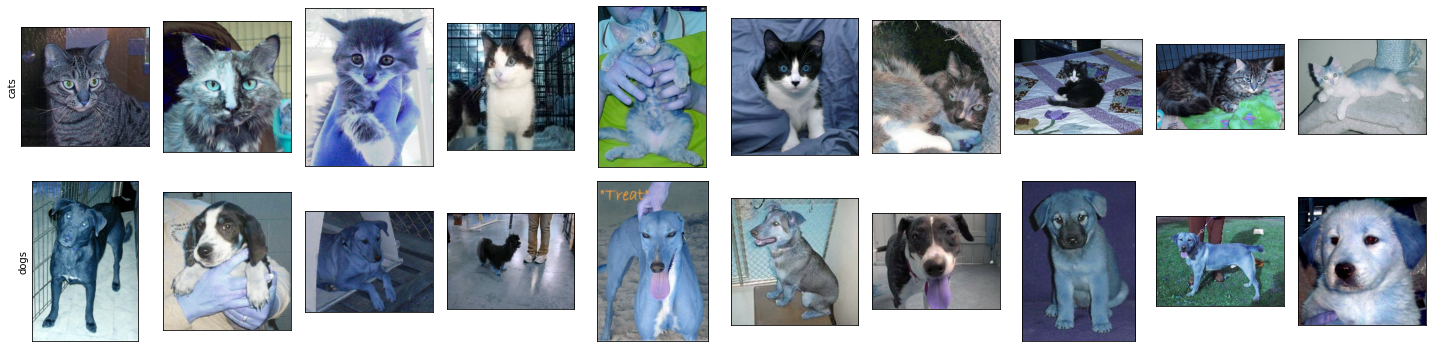

In [4]:
plt.figure(figsize=(20,5))
tmp=0
for c in Categories:
    path=os.path.join(Train_dataset,c)
    
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,tmp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if tmp%10==0:
            plt.ylabel(c)
        tmp +=1
        if tmp%10==0:
            break

plt.tight_layout()
plt.show()

In [5]:
img_size=227
train_data=[]
for c in Categories:
    path=os.path.join(Train_dataset, c)
    class_num=Categories.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            img_resized=cv2.resize(img_arr,(img_size,img_size))
            train_data.append([img_resized,class_num])
        except Exception as e:
            pass

print(len(train_data))

100%|█████████████████████████████████████████████████████████████████████████████| 4006/4006 [00:09<00:00, 426.15it/s]

8005


In [6]:
img_size=227
test_data=[]
for c in Categories:
    path=os.path.join(Test_dataset, c)
    class_num=Categories.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr=cv2.imread(os.path.join(path,img))
            img_resized=cv2.resize(img_arr,(img_size,img_size))
            test_data.append([img_resized,class_num])
        except Exception as e:
            pass

print(len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1013/1013 [00:02<00:00, 368.80it/s]

2023


In [7]:
random.shuffle(train_data)
random.shuffle(test_data)

In [8]:
X_train = []
Y_train = []
for img,label in train_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,227,227,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)

(8005, 227, 227, 3) (8005,)


In [9]:
X_test = []
Y_test = []
for img,label in test_data:
    X_test.append (img)
    Y_test.append (label)

X_test = np.array(X_test).astype('float32').reshape (-1,227,227,3)
Y_test = np.array (Y_test)

print (X_test.shape, Y_test.shape)

(2023, 227, 227, 3) (2023,)


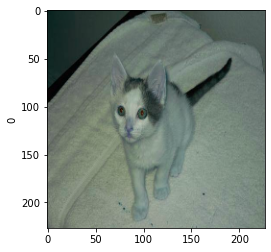

In [10]:
plt.figure()
plt.imshow(X_train[2000].astype('uint8'))
plt.ylabel(Y_train[2000])
plt.show()

In [11]:
p = open ('D:/ML/envs/cvpr/Datasets/X_train.pickle','wb')
pickle.dump(X_train, p)
p.close()

p = open ('D:/ML/envs/cvpr/Datasets/Y_train.pickle','wb')
pickle.dump(Y_train, p)
p.close()

p = open ('D:/ML/envs/cvpr/Datasets/X_test.pickle','wb')
pickle.dump(X_test, p)
p.close()

p = open ('D:/ML/envs/cvpr/Datasets/Y_test.pickle','wb')
pickle.dump(Y_test, p)
p.close()

In [12]:
pickle_in = open("D:/ML/envs/cvpr/Datasets/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("D:/ML/envs/cvpr/Datasets//Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("D:/ML/envs/cvpr/Datasets/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("D:/ML/envs/cvpr/Datasets/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (8005, 227, 227, 3) Y_train= (8005,)
X_test= (2023, 227, 227, 3) Y_test= (2023,)


In [13]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[10.412303 10.412303 10.412303]


In [14]:
X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [15]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

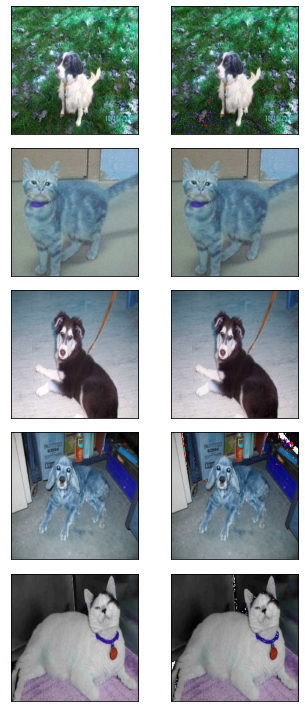

In [16]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [18]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()


ResourceExhaustedError: failed to allocate memory [Op:AddV2]